### Домашнее задание Transformers Training (50 баллов)

В этом домашнем задании требуется обучить несколько Transformer-based моделей в задаче машинного перевода. Для обучения можно воспользоваться текущим проектом, так и реализовать свой пайплайн обучения. Если будете использовать проект, теги **TODO** проекта отмечают, какие компоненты надо реализовать.
В ноутбуке нужно только отобразить результаты обучения и выводы. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Ваш код обучения нужно выложить на ваш github, в строке ниже дать ссылку на него. В первую очередь будут оцениваться результаты в ноутбуке, код нужен для проверки адекватности результатов. 

Обучать модели до конца не нужно, только для демонстрации, что модель обучается и рабочая - снижение val_loss, рост bleu_score.

#### Сcылка на ваш github с проектом(вставить свой) - https://github.com/wibbn/pytorch-machine-translation

Ноутбук с результатами выкладывать на ваш **google диск** курса. 

### Данные

`
wget https://www.manythings.org/anki/rus-eng.zip && unzip rus-eng.zip
`

Модели нужно обучить на задаче перевода с английского на русский. 

### Обучение Seq2seq Transformer модель(25 баллов)

Реализуйте Seq2seq Transformer. В качестве блока трансформера можно использовать https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html. В качестве токенизатора воспользуйтесь HuggingFace токенизатор для source/target языков - https://huggingface.co/docs/transformers/fast_tokenizers
В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. 

Не забудьте остальные элементы модели:
* Мы можем использовать 1 трансформер как энкодер - декодером будет выступать линейный слой. 
* Обучите свой BPE токенизатор - https://huggingface.co/docs/transformers/fast_tokenizers
* Матрицу эмбеддингов токенов
* Матрицу позицонных эмбеддингов
* Линейный слой проекции в target словарь
* Функцию маскирования будущих состояний attention, так как модель авто-регрессионна
* Learning rate schedualer


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, размерность скрытого слоя, количетсво слоев
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text

In [ ]:
import json
import ast

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
logs = []
with open('./training_logs/progress_log.txt', 'r') as f:
    cfg = ast.literal_eval(f.readline())
    for line in f.readlines():
        logs.append(ast.literal_eval(line))

In [ ]:
steps = np.arange(len(logs))
train_loss = []
val_loss = []
bleu_score = []

for log in logs:
    train_loss.append(log['train_loss'])
    val_loss.append(log['val_loss'])
    bleu_score.append(log['bleu_score'])

## Params

In [ ]:
cfg

{'embedding_size': 100,
 'hidden_size': 100,
 'learning_rate': 0.001,
 'epoch_num': 10000,
 'try_one_batch': True,
 'max_seq_len': 200,
 'max_vocab_size': 4000,
 'sched_step_size': 100,
 'sched_gamma': 0.1,
 'nhead': 5,
 'num_layers': 5,
 'dim_feedforward': 1024}

## Train results

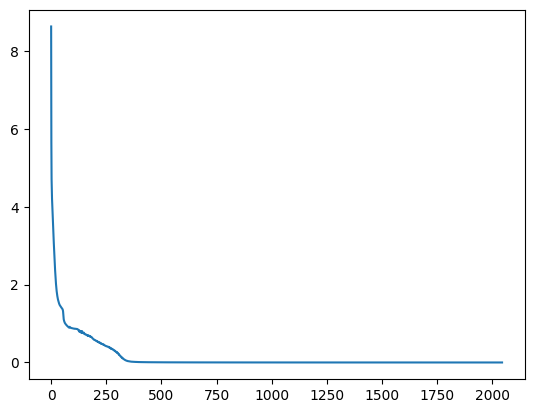

In [ ]:
plt.plot(steps, train_loss);

## Val results

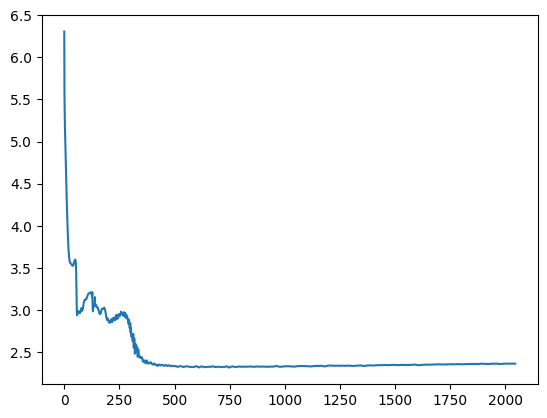

In [ ]:
plt.plot(steps, val_loss);

## Bleu score

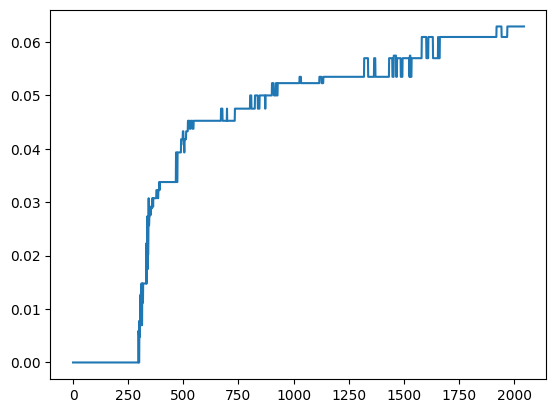

In [ ]:
plt.plot(steps, bleu_score);

## Translation examples:

BLEU score: 0.04347208738327026

Source:  it s not every day you get a building named after you 	Target:  не каждый день е твою честь называют здание 	Predicted:  у не не не не не не на

Source:  i didn t know that they did things like that 	Target:  м не знал что они занимаются такими вещами 	Predicted:  никто что что они это это это

Source:  the murderer was executed this morning 	Target:  убийцу казнили сегодня утром 	Predicted:  у был это это

Source:  they told me that tom had already left 	Target:  они сказали мне что том уже ушёл 	Predicted:  они сказал мне что том уже уже

Source:  i m going to make you an offer that you can t 	Target:  м собираюсь сделать тебе предложение от которого ты не сможешь отказаться 	Predicted:  у тебя тебе тебя ты

Source:  we re having the same problems that tom is having 	Target:  мы столкнулись з теми же проблемами что т том 	Predicted:  мы мы это это это это это

Source:  she said that the mere sight of him made her sick 	Target:  она сказала что при одном взгляде на него её тошнит 	Predicted:  она сказал что его его его его его

Source:  his dog appeared suddenly from behind the door 	Target:  из за двери вдруг появилась его собака 	Predicted:  его я я у у

Source:  she advised him to stop taking that medicine 	Target:  она посоветовала ему прекратить принимать это лекарство 	Predicted:  она его его его его это это

Source:  he is late let s wait for him till 	Target:  он опаздывает давайте подождем его до 	Predicted:  он будет его его его его

### Fine-tune pretrained T5 (25 баллов)

Реализуйте Seq2seq Pretrained T5. Воспользуйтесь https://huggingface.co/docs/transformers/model_doc/t5 предобученной моделью. В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Не забудьте важные аспекты обучения модели:
* Взять готовый t5 токенизатор
* Resize matrix embedding - скорей всего ваша матрица эмбеддингов не будет включать эмбеддинги из вашего сета. Пример обновления матрицы эмбеддингов тут тут https://github.com/runnerup96/Transformers-Tuning/blob/main/t5_encoder_decoder.py
* Learning rate schedualer/Adafactor with constant learning rate


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, pretrained model name
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text

In [3]:
cfg

{
  'learning rate': 0.005
  'batch size': 192
  'pretrained_model_name': 'google/t5-efficient-mini'
}


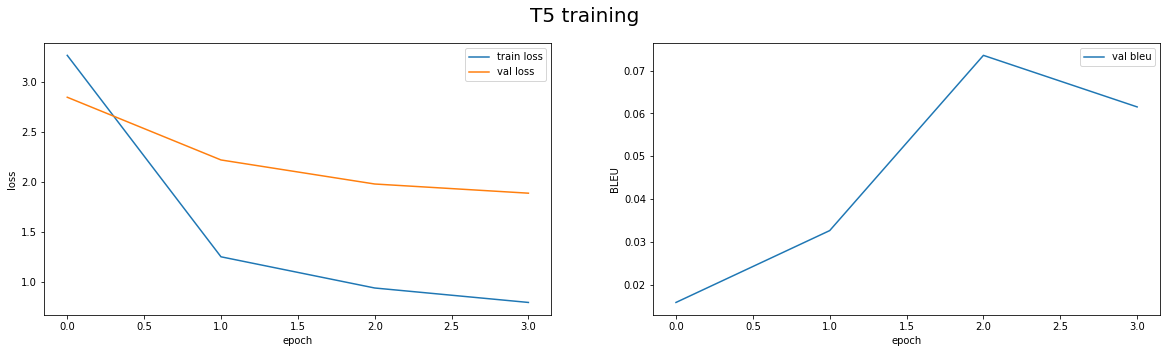

In [ ]:
plot_results(train_loss_list, val_loss_list, val_bleu_list)

BLEU:  0.07356349130299715

испытываем совершенно новый способ ---> совершеннонима новое новый

подумываю о том чтобы переехать в австралию ---> думаю о пере пере в ввстрастрали

ведь знал что том не сможет этого сделать ---> знал что том не сделать сделать

сказала тому не разговаривать с набитым ртом ---> томаа не разговаривать разговаривать с с

люблю животных например собак и кошек ---> нравится животных как собак собак собак собак собак

утром по пути в школу том столкнулся с мэри ---> прошлой в мэри прошлой прошлой в школу школу

язык на котором том говорит французский ---> язык том говорит говорит говорит говоритфранцузскифранцузски

вижу смысла знакомить его с японской литературой ---> не ответить япопониинии

нет нужды говорить тебе насколько это важно или есть ---> не нужно сказать ты это это

понимаю что вы с томом были друзьями ---> понимаю что ты с с сомом